## ANALISI DATI 'Data_LL_Session.xlsx' - CORSO DI MARKETING


Il seguente script python è un analisi dati prettamente descrittiva (per ora), del DataFrame Data_LL_Session,
fornito dal docente Ernesto D'Avanzo per il corso di Marketing di Economia e Management.
(2) Viene integrata una seconda parte, dove vengono usati i dati analizzati per la costruzione di un Funnel sul caso Analisi 'AMAZON'.

### Descrizione del DataFrame - Prima parte
Abbiamo due dataset:
1. Buyers.csv contiene la valutazione dell'utilità delle seguenti opzioni organizzative nell'aiutare a trovare il prodotto che si desidera acquistare, su una scala da (1-5).

2. New_Sellers.csv contiene la presenza (1) o meno (0) delle opzioni organizzative, in un campione complessivo di 594 siti.

### Confronto e Analisi Amazon - Seconda parte
Costruzione di un Funnel di confronto fra apprezzamento medio dei servizi web sui siti di e-commerce e presenza 
di tali servizi su www.amazon.com.

## Descrizione del DataFrame - Prima parte

In [32]:
# importo librerie esterne utili

# analisi dati
import pandas as pd 
import numpy as np

# rappresentazione grafica 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# File Path
DATA_PATH = "C:/Users/ettor/OneDrive/Documenti/UNITN - TRIENNALE/CORSI/3 anno, 1 SEM/Marketing/LL/LL_1_Session/Input/"

### Processo di pulizia e preparazione dati (esterno)

Innanzitutto, prelevo manualmente i dati dal file 'Data_LL_Session.xlsx' e creo due fogli LibreOffice,
1 foglio 'Buyers.csv' per i consumatori e un foglio 'Sellers.csv' con i dati dei rivenditori.

In seguito, creo un ulteriore foglio 'New_Sellers.csv' con solamente i dati dei rivenditori evidenziati
di verde, che sono i dati che corrispondono al foglio 'Buyers.csv'.

Alla fine del processo, ho filtrato le colonne del foglio Sellers di 'Data_LL_Session.xlsx' con solamente 
le colonne che mi interessano ed ho due file in formato csv con i dati in questione.
Sono quindi pronto per caricare i due dataset ed elaborare i dati con Python.

In [33]:
# carico dataset da file csv
data_sell = pd.read_csv(DATA_PATH + 'New_Sellers.csv')
data_buy = pd.read_csv(DATA_PATH + 'Buyers.csv')

In [34]:
# verifichiamo di avere lo stesso numero di colonne in entrambi i dataset
print(f'Numero di colonne in New_Sellers: {len(data_sell.columns)}')
print(f'Numero di colonne in Buyers: {len(data_buy.columns)}')

Numero di colonne in New_Sellers: 37
Numero di colonne in Buyers: 37


### Analizziamo il dataset 'Buyers.csv'

In [35]:
data_buy.head()

,1_1 - Shop by categories,1_2 - Shop by brand,1_3 - Shop by price,1_4 - Shop by recipient,1_5 - Shop by alphabetical order,1_6 - Shop by “occasions”,1_7 - Shop by Products on sale,1_8 - Shop by Top sellers,2_1 - Product description,2_2 - Users’ reviews,...,"8_1 - ""E-mail a friend"" link",8_2 - Gift certificate,9_1 - Credit cards,9_2 - Fidelity card,9_3 - Bank transfers,9_4 - Checks,9_5 - Cash,9_6 - PayPal,9_7 - BillMeLater,9_8 - Coupons
0,4,5,5,5,2,4,5,4,5,5,...,4,3,5,0,1,1,1,5,1,5
1,5,4,4,3,2,2,3,3,5,5,...,2,3,4,0,2,2,1,5,3,0
2,5,5,5,3,1,4,5,3,5,5,...,3,5,5,0,2,1,1,5,2,5
3,5,5,5,0,1,1,1,1,5,4,...,1,1,5,1,3,1,1,3,1,1
4,5,5,3,5,3,2,2,2,5,5,...,2,2,5,0,1,2,1,1,2,0


In [36]:
# controllo dimensioni dei data set 
print(data_buy.shape)

(164, 37)


In [37]:
# rinonimo le colonne perchè diverse dagli indici del dataset 'sellers.csv'
nuovi_nomi_colonne = []
for i in range(len(data_buy.columns)):
    nuovi_nomi_colonne.append(str(data_buy.columns[i])[6:])
data_buy.columns = nuovi_nomi_colonne
data_buy.head()

,Shop by categories,Shop by brand,Shop by price,Shop by recipient,Shop by alphabetical order,Shop by “occasions”,Shop by Products on sale,Shop by Top sellers,Product description,Users’ reviews,...,"""E-mail a friend"" link",Gift certificate,Credit cards,Fidelity card,Bank transfers,Checks,Cash,PayPal,BillMeLater,Coupons
0,4,5,5,5,2,4,5,4,5,5,...,4,3,5,0,1,1,1,5,1,5
1,5,4,4,3,2,2,3,3,5,5,...,2,3,4,0,2,2,1,5,3,0
2,5,5,5,3,1,4,5,3,5,5,...,3,5,5,0,2,1,1,5,2,5
3,5,5,5,0,1,1,1,1,5,4,...,1,1,5,1,3,1,1,3,1,1
4,5,5,3,5,3,2,2,2,5,5,...,2,2,5,0,1,2,1,1,2,0


In [38]:
# rinomino le colonne di data_buy con lo stesso nome delle colonne di data_sell

# rinomino le colonne con nomi differenti 
data_buy.rename(columns={'"E-mail a friend" link': 'E-mail a friend link'}, inplace=True)
data_buy.rename(columns={'Currency converter': 'Currency convertor'}, inplace=True)
data_buy.rename(columns={'Gift certificate ': 'Gift certificates'}, inplace=True)
data_buy.rename(columns={'Google checkout available': 'Google checkout accepted'}, inplace=True)
data_buy.rename(columns={'Holiday specials offers': 'Special offers'}, inplace=True)
data_buy.rename(columns={'Indicator of path ': 'Indicator of path'}, inplace=True)
data_buy.rename(columns={'Links to new items on HP': 'Link to new items in HP'}, inplace=True)
data_buy.rename(columns={'Number of items': 'Num of items'}, inplace=True)
data_buy.rename(columns={'Product description': 'Product description/guide'}, inplace=True)
data_buy.rename(columns={'Products comparison': 'Products compare'}, inplace=True)
data_buy.rename(columns={'Shop by Products on sale': 'Products on sales'}, inplace=True)
data_buy.rename(columns={'Shop by Top sellers': 'Top sellers'}, inplace=True)
data_buy.rename(columns={'Shop by alphabetical order': 'Shop by alphabetically'}, inplace=True)
data_buy.rename(columns={'Shop by “occasions”': 'Shop by occasions'}, inplace=True)
data_buy.rename(columns={'Shop by recipient ': 'Shop by recipient'}, inplace=True)
data_buy.rename(columns={'Shopping guide online': 'Shopping guide**'}, inplace=True)
data_buy.rename(columns={'Users’ reviews': "Users' reviews"}, inplace=True)
data_buy.rename(columns={'Shop by Products on sale': 'Products on sales'}, inplace=True)
data_buy.rename(columns={'Shop by Products on sale': 'Products on sales'}, inplace=True)

# riordino gli indici in ordine alfabetico 
data_sell = data_sell.reindex(sorted(data_sell.columns), axis=1)
data_buy = data_buy.reindex(sorted(data_buy.columns), axis=1)

# faccio un check che siano tutte uguali 
sono_identici = data_buy.columns.equals(data_sell.columns)

if sono_identici:
    print("Gli indici delle colonne sono identici.")
else:
    print("Gli indici delle colonne non sono identici.")

Gli indici delle colonne sono identici.


In [39]:
# mi ricavo l'apprezzamento medio per ogni colonna
medie = data_buy.mean()
print(f'Apprezzamento medio di ogni categoria:\n\n{medie.head()}')

Apprezzamento medio di ogni categoria:

Bank transfers    2.109756
BillMeLater       1.768293
Cash              2.000000
Checks            1.652439
Coupons           2.469512
dtype: float64


In [40]:
# Analisi descrittiva della distribuzione delle medie
print(f'\nStatistiche descrittive della distribuzione "Apprezzamento medio":\n\n{medie.describe()}')


Statistiche descrittive della distribuzione "Apprezzamento medio":

count    37.000000
mean      3.192815
std       0.904120
min       1.451220
25%       2.524390
50%       3.121951
75%       4.048780
max       4.597561
dtype: float64


In [41]:
# Eseguo un analisi grafica 
# creo un dataset contentente la media dell'apprezzamento per le varie categorie di servizio

df = {
      
      "Categoria" : medie.index,
      
      "Average appreciation" : medie.values
      
}

mean_data_buy = pd.DataFrame(data = df, index = np.arange(1, len(medie)+1))
mean_data_buy.sort_values(by = ["Average appreciation"], ascending = False, inplace = True)
mean_data_buy.head()

,Categoria,Average appreciation
19,Product description/guide,4.597561
6,Credit cards,4.475610
36,Total sum,4.432927
29,Shop by categories,4.384146
26,Search engine,4.304878


In [42]:
# grafico a barre
fig1 = px.histogram(mean_data_buy , x = "Average appreciation" , y = "Categoria" , title = "Customer's appreciation of the service")
fig1.update_layout(title_x = 0.5 , yaxis_title = None , height = 1000 , barmode = "stack" , yaxis = {'categoryorder':'total ascending'} , )

fig1.show()

In [43]:
# Sorted
mean_data_buy_sorted_crex = mean_data_buy.sort_values(by="Average appreciation")
mean_data_buy_sorted_decr = mean_data_buy.sort_values(by="Average appreciation", ascending = False)

In [44]:
# plottiamo il funnel dell'apprezzamento medio
fig_funnel = px.funnel(mean_data_buy_sorted_decr, y='Categoria', x="Average appreciation")
fig_funnel.update_layout(title_text="Average appreciation", yaxis_title=None, height = 1000)
fig_funnel_area = px.funnel_area(mean_data_buy_sorted_crex, names='Categoria', values="Average appreciation")
fig_funnel_area.update_layout(title_text="Average appreciation", yaxis_title=None, height = 1000)
fig_funnel.show()
fig_funnel_area.show()

In [45]:
# Creo una funzione da chiamare per descrivere le colonne e visualizzare grafici

def data_description(data):
    
    print("VISUAL: Informazini generali/Barplot della distribuzione/Boxplot")
    print("Inserire la voce d'interesse (es.Product description/guide):\n")
    column = input(str)

    # alcune informazioni
    print(data[column].describe())

    # dimensioni del grafico
    plt.figure(figsize= (10,6))

    # barplot per la distribuzione delle preferenze 
    sns.histplot(data = data, x = column, stat='probability' , \
                    kde= True).set(title = "%s preference distribution" % column)
    # boxplot
    fig = px.box(data, x = column , title = "%s preference distribution" % column)

    # sistemiamo il boxplot
    fig.update_layout(title_text = "%s preference distribution" % column, title_x = 0.5)
    fig.show()

VISUAL: Informazini generali/Barplot della distribuzione/Boxplot
Inserire la voce d'interesse (es.Product description/guide):

count    164.000000
mean       1.451220
std        1.629125
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        5.000000
Name: Fidelity card, dtype: float64


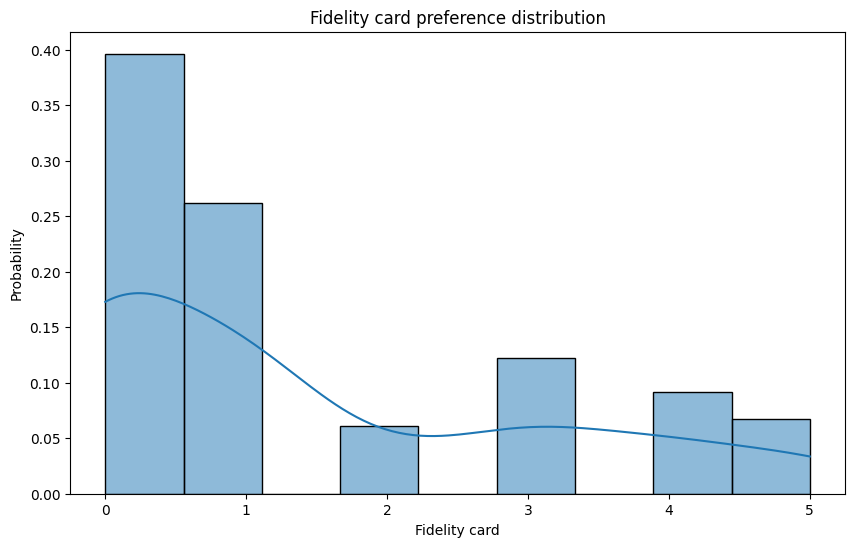

In [46]:
# chiamo la funzione per descrivere la colonna d'interesse
data_description(data_buy) 

# visualizzo esempio con indice 'Fidelity Card'

### Analizziamo il dataset 'Sellers.csv'

In [47]:
# Load dataset 'Sellers.csv'
data_sell.head()

,Bank transfers,BillMeLater,Cash,Checks,Coupons,Credit cards,Currency convertor,E-mail a friend link,Fidelity card,Gift certificates,...,Shop by brand,Shop by categories,Shop by occasions,Shop by price,Shop by recipient,Shopping guide**,Special offers,Top sellers,Total sum,Users' reviews
0,0,0,0,0,0,1,0,1,1,1,...,0,1,0,1,1,0,1,1,0,1
1,1,1,1,1,0,1,1,1,1,1,...,0,1,0,0,1,0,1,1,1,0
2,0,1,1,0,0,1,0,0,1,1,...,1,1,1,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,1,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1


In [48]:
# riordino la colonna del DataFrame mean_data_buy in ordine alfabetico 
# per farla combaciare con data_sell

sorted_mean_data_buy = mean_data_buy.sort_values(by='Categoria')

# voglio sapere quanti quanti siti in totale hanno il servizio
# e la media della prefenza di tale servizio da parte dei consumatori,
# inserendo tutto in un dataset

lista_conteggi = []
k = 1
for column in data_sell:
    conteggio = data_sell[column].value_counts()[int(1)]
    lista_conteggi.append(conteggio)
    print("Il servizio %s" % column, "è presente in %s siti." % conteggio)
    print("Mentre l'apprezzamento medio del servizio è %s.\n" % mean_data_buy["Average appreciation"].loc[k].round(2))
    k += 1

df_1 = { "Type" : data_sell.columns,
        
        "Service's presence" : lista_conteggi
}

conteggi_sellers = pd.DataFrame(data = df_1, index = np.arange(1, len(data_sell.columns)+1))
conteggi_sellers.head()

Il servizio Bank transfers è presente in 207 siti.
Mentre l'apprezzamento medio del servizio è 2.11.

Il servizio BillMeLater è presente in 44 siti.
Mentre l'apprezzamento medio del servizio è 1.77.

Il servizio Cash è presente in 181 siti.
Mentre l'apprezzamento medio del servizio è 2.0.

Il servizio Checks è presente in 139 siti.
Mentre l'apprezzamento medio del servizio è 1.65.

Il servizio Coupons è presente in 25 siti.
Mentre l'apprezzamento medio del servizio è 2.47.

Il servizio Credit cards è presente in 298 siti.
Mentre l'apprezzamento medio del servizio è 4.48.

Il servizio Currency convertor è presente in 183 siti.
Mentre l'apprezzamento medio del servizio è 2.96.

Il servizio E-mail a friend link è presente in 390 siti.
Mentre l'apprezzamento medio del servizio è 2.52.

Il servizio Fidelity card è presente in 249 siti.
Mentre l'apprezzamento medio del servizio è 1.45.

Il servizio Gift certificates è presente in 383 siti.
Mentre l'apprezzamento medio del servizio è 3.03.

I

,Type,Service's presence
1,Bank transfers,207
2,BillMeLater,44
3,Cash,181
4,Checks,139
5,Coupons,25


In [49]:
# plottiamo le seguenti informazioni
fig2 = px.histogram(conteggi_sellers, x = "Service's presence" , y = "Type" , title = "Services presence on e-commerce's websites")
fig2.update_layout(title_x = 0.5 , yaxis_title = None , height = 1000 , barmode = "stack" , yaxis = {'categoryorder':'total ascending'} , )

fig2.show()

In [50]:
# un analisi interessante può essere data dallo scatter plot interattivo
px.strip(conteggi_sellers, x = "Service's presence", hover_name='Type', color='Type', title = "Services presence on e-commerce's websites")

In [51]:
# Sorted
conteggi_sellers_sorted_crex = conteggi_sellers.sort_values(by="Service's presence")
conteggi_sellers_sorted_decr = conteggi_sellers.sort_values(by="Service's presence", ascending = False)

In [52]:
# Funnel grafico presenza del servizio
fig_funnel = px.funnel(conteggi_sellers_sorted_decr, y='Type', x="Service's presence")
fig_funnel.update_layout(title_text="Service's presence", yaxis_title=None, height = 1000)
fig_funnel_area = px.funnel_area(conteggi_sellers_sorted_crex, names='Type', values="Service's presence")
fig_funnel_area.update_layout(title_text="Service's presence", yaxis_title=None, height = 1000)
fig_funnel.show()
fig_funnel_area.show()

### Uniamo gli Histogram dell'apprezzamento medio e della presenza del servizio per una visione d'insieme 

In [53]:
# unisco i due grafici per una visione complessiva di apprezzamento e disponibilità dei servizi

# Creo una griglia di subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=('Average appreciation', "Service's presence"))

# Aggiungi i grafici alle posizioni desiderate nella griglia
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

# Imposto il layout
fig.update_layout(title_text="Comparison of average appreciation and Service's presence", height = 1000, width = 2000)

# Visualizza la griglia di subplot
fig.show()


Qualche grafico in più su il Service's presence

### Visualizzazione a torta e visualizzazione raggrupata 
Interessante è andare a raggruppare per categoria i diversi servizi secondo l'apprezzamento dei buyers. 

In [54]:
mean_data_buy.head()

,Categoria,Average appreciation
19,Product description/guide,4.597561
6,Credit cards,4.475610
36,Total sum,4.432927
29,Shop by categories,4.384146
26,Search engine,4.304878


In [55]:
# plottiamo il grafico a torta
fig = px.pie(mean_data_buy, values='Average appreciation', names='Categoria', title='Average Appreciation', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text="Buyers' decision making on e-commerce websites", height = 1200, width=1500)
fig.show()

In [56]:
# Grafico sunburst con sovracategoria

# 1 Layer di categorizzazione 
purchasing_decision_making = ["Credit cards", "PayPal", "Coupons", "Bank transfers", "BillMeLater", "Cash", "Checks", "Fidelity card"]
choosing_decision_making = ["Shop by categories", "Search engine", "Shop by price", "Shop by brand", "Products on sales", "Top sellers", "Shop by recipient", "Shop by occasions", "Shop by alphabetically", "Product description/guide", "Professional reviews", "Users' reviews", "Product pictures", "Products compare", "Special offers", "Gift certificates", "E-mail a friend link", "Recently viewed products", "Products recommendation", "Personalized products"]
explorative_decision_making = ["Total sum", "Indicator of path", "Num of items", "Label of current position", "Shopping guide**", "Currency convertor", "Google checkout accepted"]

# 2 layer di categorizzazione
payment_services = ["Credit cards", "PayPal", "Coupons", "Bank transfers", "BillMeLater", "Cash", "Checks", "Fidelity card"]
search_browsing_services = ["Shop by categories", "Search engine", "Shop by price", "Shop by brand", "Products on sales", "Top sellers", "Shop by recipient", "Shop by occasions", "Shop by alphabetically"]
description_reviews_services = ["Product description/guide", "Professional reviews", "Users' reviews", "Product pictures"]
promotional_services = ["Products compare", "Special offers", "Gift certificates", "E-mail a friend link"]
personalized_services = ["Recently viewed products", "Products recommendation", "Personalized products"]
usability_reliability_services = ["Total sum", "Indicator of path", "Num of items", "Label of current position", "Shopping guide**", "Currency convertor", "Google checkout accepted"]

def categorizza_decisione_servizio(servizio_decisione):
    if servizio_decisione in purchasing_decision_making:
        return 'Purchasing decision making'
    elif servizio_decisione in choosing_decision_making:
        return 'Choosing decision making'
    elif servizio_decisione in explorative_decision_making:
        return 'Explorative decision making'
    else:
        return 'Empty'
def categorizza_tipologia_di_servizio(servizio_tipologia):
    if servizio_tipologia in payment_services:
        return 'Payment services'
    elif servizio_tipologia in search_browsing_services:
        return 'Search browsing services'
    elif servizio_tipologia in description_reviews_services:
        return 'Description reviews services'
    elif servizio_tipologia in promotional_services:
        return 'Promotional services'
    elif servizio_tipologia in personalized_services:
        return 'Personalized services'
    elif servizio_tipologia in usability_reliability_services:
        return 'Usability reliability services'
    else:
        return 'Empty'

mean_data_buy['Decision Making'] = [categorizza_decisione_servizio(servizio_decisione) for servizio_decisione in mean_data_buy['Categoria']]
mean_data_buy['Type of Service'] = [categorizza_tipologia_di_servizio(servizio_tipologia) for servizio_tipologia in mean_data_buy['Categoria']]

In [57]:
# creo una colonna descrittiva del valore percentuale dell'apprezzamento medio nella scala da 1-5:
def percentage(i):
     percentage = (i/5) * 100
     percentage_rounded = round(percentage,2)
     percentage_string = str(percentage_rounded) + '%'
     return percentage_string

mean_data_buy['Percentage'] = [percentage(i) for i in mean_data_buy['Average appreciation']]
mean_data_buy.head()

,Categoria,Average appreciation,Decision Making,Type of Service,Percentage
19,Product description/guide,4.597561,Choosing decision making,Description reviews services,91.95%
6,Credit cards,4.475610,Purchasing decision making,Payment services,89.51%
36,Total sum,4.432927,Explorative decision making,Usability reliability services,88.66%
29,Shop by categories,4.384146,Choosing decision making,Search browsing services,87.68%
26,Search engine,4.304878,Choosing decision making,Search browsing services,86.1%


In [58]:
# plottiamo il grafico sunburst con i nuovi Hierarchical data 
fig = px.sunburst(mean_data_buy, path=['Decision Making', 'Type of Service', 'Categoria'], values='Average appreciation', hover_data=['Percentage'])
fig.update_layout(title_text="Buyers' decision making on e-commerce websites", height = 1200, width=1500)
fig.show()
print('\n')

## Confronto e Analisi Amazon - Seconda parte
Costruzione di un Funnel di confronto fra apprezzamento medio dei servizi web sui siti di e-commerce e presenza 
di tali servizi su www.amazon.com.

In [59]:
fun = pd.read_csv(DATA_PATH + 'Servizi amazon.csv')

In [60]:
fun = fun.rename(columns = lambda x: x.strip())
fun = fun.sort_values(by='Servizio Amazon')
mean_data_buy_forfun = mean_data_buy.sort_values(by='Categoria')
fun['Apprezzamento'] = mean_data_buy_forfun['Average appreciation'].values
fun.to_csv('fun ordinato.csv')
funnel = pd.read_csv('fun ordinato.csv')
funnel = funnel.sort_values(by='Apprezzamento', ascending=False)
funnel.drop(['Unnamed: 0'], axis=1, inplace=True)
servizi_molto_apprezzati = funnel[funnel['Apprezzamento'] >= 4]
servizi_mediamente_apprezzati = funnel[(funnel['Apprezzamento'] <= 4) & (funnel['Apprezzamento'] >= 2.5)]
funnel.head()

,Servizio Amazon,Presenza,Apprezzamento
18,Product description/guide,1,4.597561
5,Credit cards,1,4.475610
35,Total sum,1,4.432927
28,Shop by categories,1,4.384146
25,Search engine,1,4.304878


In [61]:
# filtriamo il data set con solo i servizi effettivamente presenti
funnel = funnel[funnel['Presenza']==1]
servizi_molto_apprezzati_amazon = funnel[funnel['Apprezzamento'] >= 4]
servizi_mediamente_apprezzati_amazon = funnel[(funnel['Apprezzamento'] <= 4) & (funnel['Apprezzamento'] >= 2.5)]
funnel_decx = funnel
funnel_crex = funnel.sort_values(by='Apprezzamento', ascending=True)

In [62]:
# codice molto incasinato e poco efficiente, ps: sono un principiante con python per l'analisi dati...
funnel_amazon = px.funnel(funnel_decx, x = 'Apprezzamento', y = 'Servizio Amazon', height=800, title = 'Incrocio Apprezzamento medio e Servizi presenti su Amazon')
funnel_amazon.show()
funnel_area_amazon = px.funnel_area(funnel_crex, names='Servizio Amazon', values='Apprezzamento', height=800, title = 'Incrocio Apprezzamento medio e Servizi presenti su Amazon')
funnel_area_amazon.show()
print('\nSecondo il nostro campione buyers:\n')
print(f'I servizi molto apprezzati sono: {servizi_molto_apprezzati.shape[0]}; Amazon possiede esattamente {servizi_molto_apprezzati_amazon.shape[0]} di questi servizi.\n')
print(f'I servizi mediamente apprezzati sono: {servizi_mediamente_apprezzati.shape[0]}; Amazon possiede esattamente {servizi_mediamente_apprezzati_amazon.shape[0]} di questi servizi.\n')

lista_servizi_molto_apprezzati_amazon = []
lista_servizi_mediamente_apprezzati_amazon = []

for j in servizi_molto_apprezzati_amazon['Servizio Amazon']:
    lista_servizi_molto_apprezzati_amazon.append(j)

for x in servizi_mediamente_apprezzati_amazon['Servizio Amazon']:
    lista_servizi_mediamente_apprezzati_amazon.append(x)

lista_molto_apprezzati_assenti = []
lista_mediamente_apprezzati_assenti = []

for i in servizi_molto_apprezzati['Servizio Amazon']:
    if i not in lista_servizi_molto_apprezzati_amazon:
        lista_molto_apprezzati_assenti.append(i)

for k in servizi_mediamente_apprezzati['Servizio Amazon']:
    if k not in lista_servizi_mediamente_apprezzati_amazon:
        lista_mediamente_apprezzati_assenti.append(k)

print(f'Amazon dovrebbe SICURAMENTE aggiungere: {lista_molto_apprezzati_assenti}, in quanto servizi molto apprezzati assenti nel sito.')
print('')
print(f'Amazon dovrebbe PROBABILMENTE aggiungere: {lista_mediamente_apprezzati_assenti}, in quanto servizi mediamente apprezzati assenti nel sito.')


Secondo il nostro campione buyers:

I servizi molto apprezzati sono: 10; Amazon possiede esattamente 8 di questi servizi.

I servizi mediamente apprezzati sono: 18; Amazon possiede esattamente 16 di questi servizi.

Amazon dovrebbe SICURAMENTE aggiungere: ['Indicator of path', 'Professional reviews'], in quanto servizi molto apprezzati assenti nel sito.

Amazon dovrebbe PROBABILMENTE aggiungere: ['Shop by brand', 'Label of current position'], in quanto servizi mediamente apprezzati assenti nel sito.


### Considerazioni:
Nonstante il confronto tra Amazon e il nostro campione di siti E-commerce, dovremmo affidarci ai numeri e aggiungere chiaramente questi servizi?

L'indicator of path è probabilmente inutile nel caso di Amazon: chi si rivolge al sito in questione, spesso ha un'idea ben chiara di cosa vuole acquistare. Potrebbe avere senso, forse, per settori specifici con prodotti di un certo valore. Per quanto concerne le Professional reviews, anche in questo caso, la quantità di prodotti è talmente vasta e spesso i prodotti hanno un prezzo specifico così basso, che l'assunzione di figure professionali specifiche non avrebbe senso. Nel caso di settori specifici e brand con un prezzo medio al prodotto elevato, però, la profilazione di alcuni prodotti effettuata da una figura professionale potrebbe trovare spazio. 

Per quanto riguarda i servizi mediamente apprezzati, l'inserzione della possibilità di compare per il Brand, quindi pagine specifiche, dedicate ai brand migliori e il Label of current position, per sapere da dove viene spedito il pacco, potrebbero essere delle aggiunte interessanti. 